# Importing  Libraries

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D, MaxPool2D,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.activations import relu,sigmoid,softmax
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau,EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

%matplotlib inline

print("all libraries are imported")

all libraries are imported


# Loading training and test data

In [5]:
train=pd.read_csv('../input/digit-recognizer/train.csv')
test=pd.read_csv('../input/digit-recognizer/test.csv')
print("datasets are imported")

datasets are imported


In [6]:
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# create X and y and check class distribution

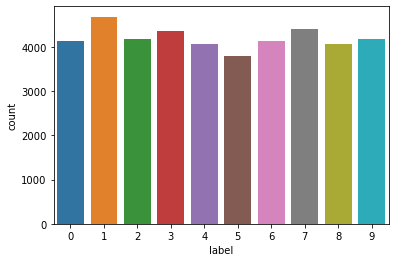

In [7]:
X=train.drop(columns='label',axis=1)
y=train['label']

sns.countplot(y)

The spreadness of classes are almost same across training data

# Data Preprocessing
      1. check missing values 
      2.normalize the data
      3.Reshape -- the features are imported as pd DataFrame. we will reshape them as numpy array
      4.One hot encoding -- labels are in digit format. we will encode them as one hot vectors. e.g 5->[0,0,0,0,0,1,0,0,0,0]
      5.train validation split - test data doesn't have label information. we will split train data into training and validation set

In [8]:
X.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [9]:
test.isnull().any().describe()


count       784
unique        1
top       False
freq        784
dtype: object

In [10]:
#normalization
X=X/255
test=test/255

#reshape
X=X.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

#one hot encoding
y=to_categorical(y,10)


In [11]:
#train val split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=101)

In [12]:
X_train.shape

(37800, 28, 28, 1)

In [13]:
X_val.shape

(4200, 28, 28, 1)

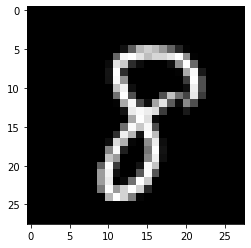

In [14]:
plt.imshow(X_train[0][:,:,0],cmap='gray')

# Model Creation

In [31]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [32]:
model=Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               590080    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)              

In [34]:
model.fit(X_train,y_train,batch_size=128,
          epochs=20,validation_data=(X_val,y_val),
          callbacks=[early_stop],verbose=1)

Epoch 1/20
296/296 [==============================] - 18s 59ms/step - loss: 0.2876 - accuracy: 0.9120 - val_loss: 0.0688 - val_accuracy: 0.9800
Epoch 2/20
296/296 [==============================] - 17s 58ms/step - loss: 0.0855 - accuracy: 0.9738 - val_loss: 0.0495 - val_accuracy: 0.9829
Epoch 3/20
296/296 [==============================] - 17s 59ms/step - loss: 0.0610 - accuracy: 0.9820 - val_loss: 0.0415 - val_accuracy: 0.9867
Epoch 4/20
296/296 [==============================] - 17s 57ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.0382 - val_accuracy: 0.9867
Epoch 5/20
296/296 [==============================] - 17s 58ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0352 - val_accuracy: 0.9879
Epoch 6/20
296/296 [==============================] - 17s 58ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0285 - val_accuracy: 0.9912
Epoch 7/20
296/296 [==============================] - 17s 58ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0291 - val_accuracy:

# Training and Validation Curves- Loss and Accuracy

In [35]:
model_metrics=pd.DataFrame(model.history.history)

In [36]:
model_metrics.head(2)

,loss,accuracy,val_loss,val_accuracy
0,0.287640,0.911958,0.068829,0.980000
1,0.085529,0.973757,0.049453,0.982857


# Loss and Accuracy curves

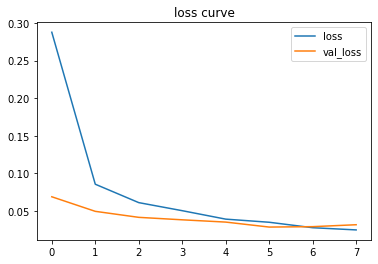

In [37]:
model_metrics[["loss","val_loss"]].plot(title="loss curve")
plt.show()

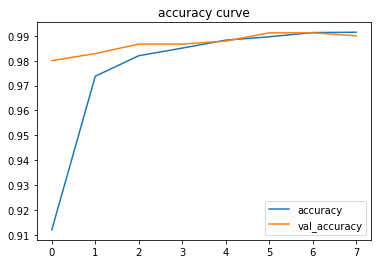

In [38]:
model_metrics[["accuracy","val_accuracy"]].plot(title="accuracy curve")
plt.show()

In [23]:
print(model.metrics_names)
print(model.evaluate(X_val,y_val,verbose=0))

['loss', 'accuracy']
[0.030409041792154312, 0.9895238280296326]


Classification Report and Confusion Metrics

In [39]:
prediction=model.predict_classes(X_val)

In [44]:
y_val=np.argmax(y_val,axis=1)

In [46]:
print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       409
           1       1.00      0.99      0.99       448
           2       1.00      0.98      0.99       416
           3       1.00      0.99      0.99       416
           4       0.98      1.00      0.99       411
           5       0.99      0.99      0.99       365
           6       0.99      1.00      0.99       427
           7       0.99      0.99      0.99       437
           8       0.99      0.99      0.99       416
           9       0.99      0.97      0.98       455

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



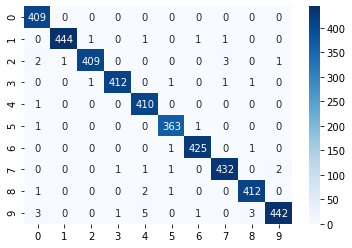

In [51]:
sns.heatmap(confusion_matrix(y_val,prediction),annot=True,cmap='Blues', fmt='g')


# Retraining the model using learning rate annealer and Data Augmentation

In [52]:
lr_decay = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.4, 
                                            min_lr=0.00001)

aug_gen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=False, 
        vertical_flip=False) 


aug_gen.fit(X_train)

In [70]:
model=Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [67]:
y_val=to_categorical(y_val,10)

In [68]:
y_val

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [71]:
model.fit_generator(aug_gen.flow(X_train,y_train, batch_size=128),
                              epochs = 20, validation_data = (X_val,y_val),
                              verbose = 2
                              , callbacks=[lr_decay,early_stop])

Epoch 1/20
296/296 - 20s - loss: 0.5090 - accuracy: 0.8358 - val_loss: 0.0672 - val_accuracy: 0.9829
Epoch 2/20
296/296 - 20s - loss: 0.1762 - accuracy: 0.9466 - val_loss: 0.0469 - val_accuracy: 0.9857
Epoch 3/20
296/296 - 21s - loss: 0.1331 - accuracy: 0.9597 - val_loss: 0.0363 - val_accuracy: 0.9907
Epoch 4/20
296/296 - 20s - loss: 0.1079 - accuracy: 0.9672 - val_loss: 0.0371 - val_accuracy: 0.9888
Epoch 5/20
296/296 - 20s - loss: 0.0947 - accuracy: 0.9709 - val_loss: 0.0285 - val_accuracy: 0.9907
Epoch 6/20
296/296 - 21s - loss: 0.0854 - accuracy: 0.9737 - val_loss: 0.0267 - val_accuracy: 0.9907
Epoch 7/20
296/296 - 20s - loss: 0.0786 - accuracy: 0.9758 - val_loss: 0.0224 - val_accuracy: 0.9919
Epoch 8/20
296/296 - 20s - loss: 0.0719 - accuracy: 0.9778 - val_loss: 0.0243 - val_accuracy: 0.9921
Epoch 9/20
296/296 - 21s - loss: 0.0653 - accuracy: 0.9803 - val_loss: 0.0211 - val_accuracy: 0.9933
Epoch 10/20
296/296 - 20s - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0208 - val_accura

In [72]:
model_metrics=pd.DataFrame(model.history.history)


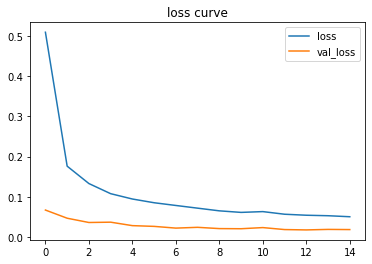

In [73]:
model_metrics[["loss","val_loss"]].plot(title="loss curve")
plt.show()

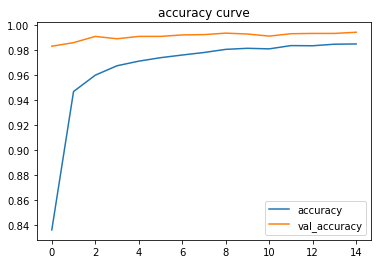

In [74]:
model_metrics[["accuracy","val_accuracy"]].plot(title="accuracy curve")
plt.show()


In [75]:
print(model.metrics_names)
print(model.evaluate(X_val,y_val,verbose=0))

['loss', 'accuracy']
[0.018723363056778908, 0.9940476417541504]


In [76]:
prediction=model.predict_classes(X_val)

y_val=np.argmax(y_val,axis=1)

print(classification_report(y_val,prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       409
           1       1.00      1.00      1.00       448
           2       0.99      0.99      0.99       416
           3       1.00      0.99      1.00       416
           4       1.00      1.00      1.00       411
           5       1.00      0.99      1.00       365
           6       1.00      1.00      1.00       427
           7       1.00      0.99      0.99       437
           8       0.99      1.00      0.99       416
           9       1.00      0.98      0.99       455

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



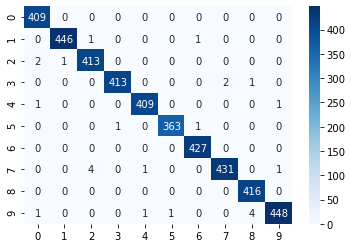

In [77]:
sns.heatmap(confusion_matrix(y_val,prediction),annot=True,cmap='Blues', fmt='g')

In [93]:
results_pred=model.predict_classes(test)

In [95]:
im_id = np.arange(1,28001)
Result = pd.DataFrame({"ImageId": im_id,"Label": results_pred})
Result.to_csv('mnist_prediction_001.csv', index=False)

# Thank you
